# Statistics & Public Health 1: Cleaning and EDA

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

You are given mosquito tracking data from 2008 to 2019.

In this deliverable, you will perform basic EDA and data wrangling to get familiar with the dataset from the city of Chicago.

Part 1 - Basic Data Wrangling
What is the shape of the dataframe?

Convert the 'Date' column to have a datetime format.

Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

Are there any columns that contain duplicate information? If so, remove the redundant columns.

Are there any null values in the dataframe? If so, deal with them appropriately.

Part 2 - Basic EDA
Using an appropriate visual, or visuals, explore the relationship between mosquito numb

r and date.
Part 3 - Advanced EDA
Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one

Using an appropriate visual, come up with an additional insight of your choice.
Note: This visual should be a different type of visualization than the previous two

Requirements
Please submit your Jupyter notebook which should include commented code and markdown cells explaining your methodology and findings.

## Part 1 - Data Wrangling

#### Import the necessary python libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Attempt 1 of reading data
# mosquito_df = pd.read_csv('mosquito_data.csv', index_col=0)
mosquito_df = pd.read_csv('mosquito_data.csv', skipinitialspace=True)

#### Shape of the DataFrame

In [8]:
rows, columns = mosquito_df.shape

# Print the shape output
print(f"The shape is \nNumber of Rows:    {rows:,} \nNumber of Columns: {columns}")

The shape is 
Number of Rows:    18,495 
Number of Columns: 13


In [9]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [10]:
mosquito_df.head(3)
# mosquito_df.tail(3)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417


In [11]:
mosquito_df.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


#### Inspect the Date column

In [12]:
mosquito_df['Date']

0        2019-09-26 00:09:00
1        2019-09-26 00:09:00
2        2019-09-26 00:09:00
3        2019-09-26 00:09:00
4        2019-09-26 00:09:00
                ...         
18490    2016-09-09 00:09:00
18491    2007-08-24 00:08:00
18492    2016-07-27 00:07:00
18493    2017-08-17 00:08:00
18494    2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: object

The 'Date' column/field is an object type (str)

#### Ways to convert object to a datetime

In [13]:
# Convert a Series 'df['Date']' to datetime by calling a function 'to_datetime'
# pd.to_datetime(mosquito_df['Date'])

# By converting using the function 'astype()'
mosquito_df['Date'].astype('datetime64[ns]')

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

In [14]:
# Below code will remove the time.
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date']).dt.date.astype('datetime64[ns]')
mosquito_df.head(3)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417


In [16]:
# Reassign back the data (without the time) back to the column/field 'Date'
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date']).dt.date.astype('datetime64[ns]')

# Check if properly done.
mosquito_df['Date']

0       2019-09-26
1       2019-09-26
2       2019-09-26
3       2019-09-26
4       2019-09-26
           ...    
18490   2016-09-09
18491   2007-08-24
18492   2016-07-27
18493   2017-08-17
18494   2015-08-20
Name: Date, Length: 18495, dtype: datetime64[ns]

#### Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

The 'Address Block' column/fields contains  information about the places where the trap is placed.
While the 'Species' column/fields about the type of mosquito. Both is a string object.

In [17]:
mosquito_df.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

In [18]:
mosquito_df[['Address Block', 'Species']].dtypes

Address Block    object
Species          object
dtype: object

The 'Week' and 'Date' column/field is a numeric value. Date as datetime64 and Week as int64. Considered discrete numbers.

In [19]:
mosquito_df[['Week', 'Date']].dtypes

Week             int64
Date    datetime64[ns]
dtype: object

#### Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [20]:
# Check for duplicate rows and get the total
num_of_duplicate = mosquito_df.duplicated().sum()

In [21]:
# Check for duplicate percentage
avg_of_duplicate = mosquito_df.duplicated().mean()*100

In [22]:
# Check if the duplicated rows are removed.
print(f'There are {num_of_duplicate} duplicated rows. Average of {avg_of_duplicate:.2f}%')

There are 658 duplicated rows. Average of 3.56%


In [24]:
# Check for duplicate rows count
mosquito_df[mosquito_df.duplicated()].count()

Year               658
Week               658
Address Block      658
Block              658
Trap               658
Trap type          658
Date               658
Mosquito number    658
Mosquito ID        658
WNV Present        658
Species            658
Lat                  0
Lon                  0
dtype: int64

#### Ways of dropping duplicated rows

In [25]:
# Using the inplace=True argument
# mosquito_df.drop_duplicates(inplace=True)

# Or by re-assign it back to the DataFrame
mosquito_df = mosquito_df.drop_duplicates()

In [27]:
# Check for duplicate rows and get the total
num_of_duplicate = mosquito_df.duplicated().sum()

# Check for duplicate percentage
avg_of_duplicate = mosquito_df.duplicated().mean()*100

# Check if the duplicated rows are removed.
print(f'There are {num_of_duplicate} duplicated rows. Average of {avg_of_duplicate:.3f}%')

There are 0 duplicated rows. Average of 0.000%


#### Check column wise if there are duplicates

In [28]:
# mosquito_df.transpose().duplicated()

#Another way
mosquito_df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

There are no duplicated columnwise. But the Year seems redundant because
the Date contains the year too.

In [29]:
# Drop the 'Year' column/field
mosquito_df.drop('Year', axis=1).T.duplicated()

Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [30]:
# Check if the year is properly drop.
mosquito_df

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,63XX W 64TH ST,63,T155,GRAVID,2013-08-29,3,Pip,positive,CULEX PIPIENS,41.776009,-87.779408
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176


The 'Year' column/field is removed.

#### Are there any null values in the dataframe? If so, deal with them appropriately.

In [31]:
mosquito_df.head(3)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417


In [32]:
# mosquito_df.isna().sum()
mosquito_df.isna().mean()*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

There are 2266 null (12.70 %) values at columns 'Lat' and 'Lon'

In [33]:
# Check which Address Block is missing data on 'Lat' and 'Lon'
mosquito_df.groupby(['Address Block']).sum()

C:\Users\jprna\AppData\Local\Temp\ipykernel_13952\3124880303.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mosquito_df.groupby(['Address Block']).sum()


,Year,Week,Block,Mosquito number,Lat,Lon
Address Block,,,,,,
100XX W OHARE,358185,5469,17800,1637,0.000000,0.000000
100XX W OHARE AIRPORT,3018465,45686,149900,20812,0.000000,0.000000
101XX S STONY ISLAND AVE,742958,11648,37269,8117,15391.209196,-32318.699654
104XX S OGLESBY AVE,2008,32,104,2,41.706024,-87.565835
104XX S VINCENNES AVE,277673,4060,14352,653,5755.198778,-12096.677559
...,...,...,...,...,...,...
93XX S DR MARTIN LUTHER KING JR DR,24084,386,1116,43,500.688413,-1051.372128
96XX S HOYNE AVE,26091,387,1248,45,542.336223,-1139.773165
96XX S LONGWOOD DR,6039,84,288,26,125.155787,-263.006779


There are three Address Block have null data 
( 100XX W OHARE, 100XX W OHARE AIRPORT, 98XX S AVENUE G )

In [34]:
# Total rows - 18,495
#  All rows (11 row) is missing data on Lat and Lon
# mosquito_df[(mosquito_df['Address Block']=='98XX S AVENUE G')].isna().count() # 11

# All 1538 rows is missing data on Lat and Lon
mosquito_df[(mosquito_df['Address Block']=='100XX W OHARE AIRPORT')].isna().count() # 1499

# All 178 rows is missing data on Lat and Lon.
# mosquito_df[(mosquito_df['Address Block']=='100XX W OHARE')].isna().count() # 178

Year               1499
Week               1499
Address Block      1499
Block              1499
Trap               1499
Trap type          1499
Date               1499
Mosquito number    1499
Mosquito ID        1499
WNV Present        1499
Species            1499
Lat                1499
Lon                1499
dtype: int64

In [35]:
# Below code checks how many rows are null.
# mosquito_df[(mosquito_df['Address Block']=='98XX S AVENUE G')].isna().mean()*100 # 100%
# mosquito_df[(mosquito_df['Address Block']=='100XX W OHARE AIRPORT')].isna().mean()*100 # 100%
# mosquito_df[(mosquito_df['Address Block']=='100XX W OHARE')].isna().mean()*100 # 100%

Total - 18,495
The 100XX W OHARE AIRPORT has around 8% missing out of the total row.
Decided to plug a number taken from the website.

While the 100XX W OHARE & 98XX S AVENUE G just left it as is since it is just below 1%.

Search the web for the information.
Latitude and longitude coordinates are: 41.978611, -87.904724.
(OHare) <https://www.latlong.net/place/o-hare-international-airport-chicago-il-usa-27486.html>

## Part 2 - Basic EDA Using an appropriate visual, or visuals, explore the 
#### Relationship between mosquito number and date. 

In [ ]:
# The 'Date' field is not properly sorted.
# Below code will sort the 'Date' column/field
mosquito_df = mosquito_df.sort_values(by="Date", ascending=True)
mosquito_df.head(20)

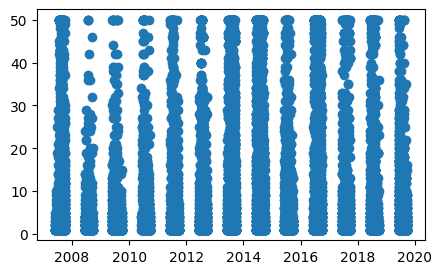

In [38]:
import seaborn as sns

# Assign variables
date = mosquito = mosquito_df['Date']
num_mosquitos = mosquito_df['Mosquito number']
date
# num_mosquitos

plt.figure(figsize=(5, 3))

plt.plot_date(date, num_mosquitos)
plt.show()

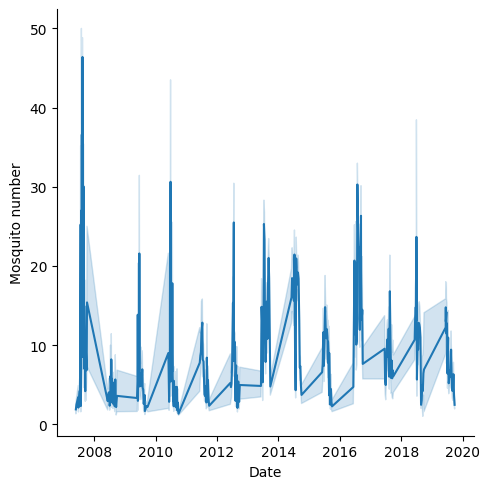

In [41]:
sns.relplot(data=mosquito_df, x="Date", y="Mosquito number", kind="line")

In 2008 there has a big spike in mosquito catch.

#### Advanced EDA Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

Text(0, 0.5, 'Numbers')

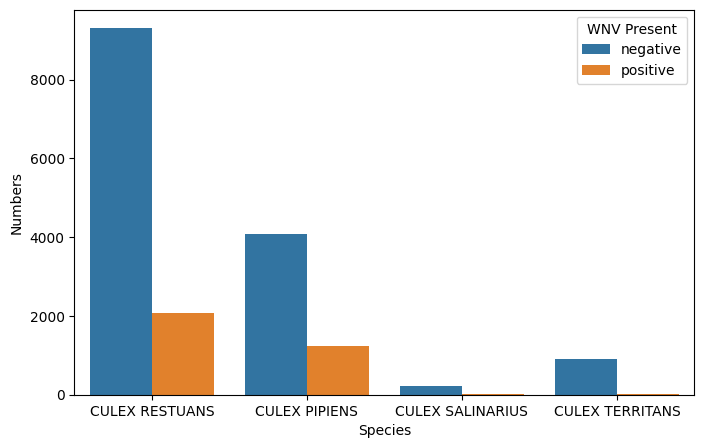

In [39]:
fig, ax = plt.subplots(figsize=(8, 5)) 

# Relationship between mosquito species and WNV prevalence.
gfig = sns.countplot(data=mosquito_df, x="Species", hue="WNV Present",ax=ax)
gfig.set_ylabel("Numbers")

The West Nile Virus is seen on the Culex Restuans and Culex Pipiens species.

####  Relationship between the number of mosquitos caught and trap type

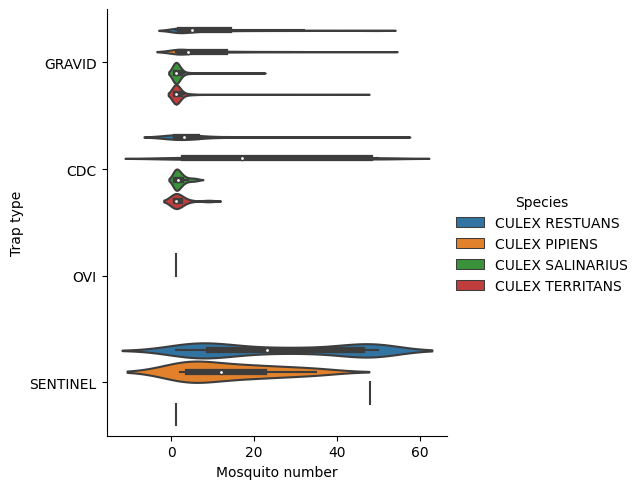

In [40]:
sns.catplot(
    data=mosquito_df, x="Mosquito number", y="Trap type", hue="Species", kind="violin",
)

The SENTINEL trap has caught a large number of Culex Restuans and Culex Pipiens.
However, the GRAVID trap has caught different kinds of mosquito.

Below chart shows that the Culex Restuans are the most common type of mosquito. Followed by the Culex Pipiens.

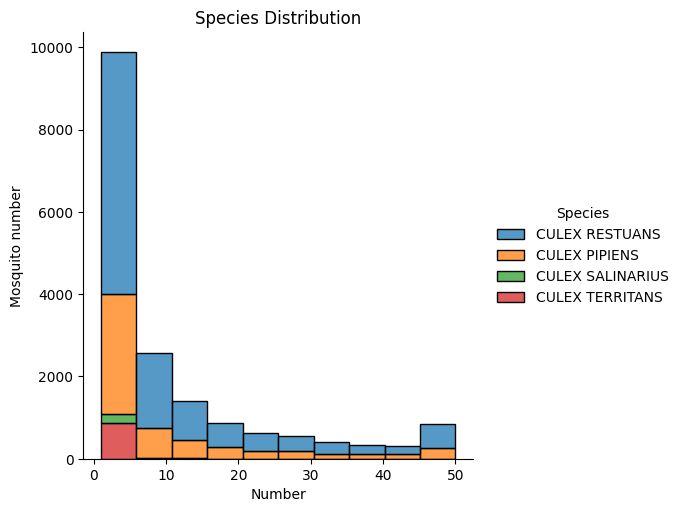

In [50]:
gdplt = sns.displot(data=mosquito_df, x="Mosquito number", hue="Species", multiple="stack", bins=10)
gdplt.set(xlabel ="Number", ylabel = "Mosquito number", title ='Species Distribution')
# gdplt.set_ylabel("Numbers")

<Axes: xlabel='Date', ylabel='Mosquito number'>

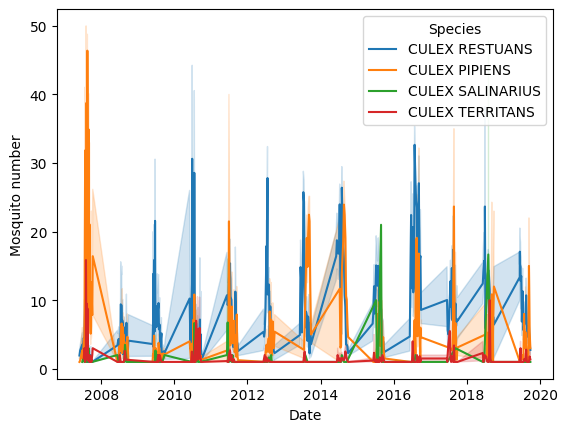

In [45]:
sns.lineplot(data=mosquito_df, x="Date", y="Mosquito number", hue="Species")